Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2841 - val_loss: 2.4492
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2043 - val_loss: 2.4381
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3619 - val_loss: 2.4271
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1414 - val_loss: 2.4157
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4569 - val_loss: 2.4038
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2506 - val_loss: 2.3909
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0649 - val_loss: 2.3775
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8889 - val_loss: 2.3574
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2981 - val_loss: 2.3361
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4155 - val_loss: 2.3154
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9487 - val_loss: 2.2969
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1552 - val_lo

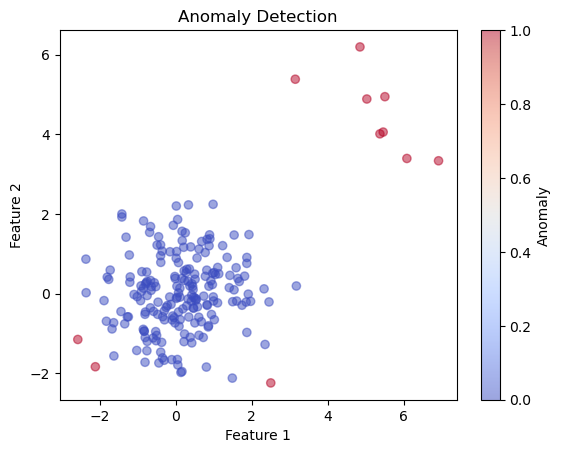

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0) # For reproducibility

# Create normal data with a mean of 0 and standard deviation of 1
normal_data = np.random.normal(0, 1, (1000, 2))

# Create anomalous data with a mean of 5 and standard deviation of 1
anomalous_data = np.random.normal(5, 1, (50, 2))

# Create labels for the data (not used in training, just for understanding)
labels_normal = np.zeros(len(normal_data)) # Normal data label

labels_anomalous = np.ones(len(anomalous_data)) # Anomalous data label

# Combine normal and anomalous data into one dataset
data = np.vstack((normal_data, anomalous_data))
labels = np.concatenate((labels_normal, labels_anomalous))

# Split data into training and test sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)

# Define the autoencoder model
input_dim = X_train.shape[1] # Number of features in the input data

# Encoder part of the autoencoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8, activation='relu')(inputs) # Reduce dimensionality
encoded = layers.Dense(4, activation='relu')(encoded) # Further reduce dimensionality

# Decoder part of the autoencoder
decoded = layers.Dense(8, activation='relu')(encoded) # Reconstruct data
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded) # Output layer
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded) # Output layer matches input dimensionality
# Create the autoencoder model
autoencoder = models.Model(inputs, decoded)

# Compile the model with Adam optimizer and mean squared error loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder using the normal data
autoencoder.fit(
X_train, X_train,
epochs=50, # Number of epochs for training
batch_size=32, # Size of each training batch
shuffle=True, # Shuffle the data before each epoch
validation_split=0.1 # Use 10% of training data for validation
)
# Predict the reconstruction of the test data
reconstructed = autoencoder.predict(X_test)

# Calculate the reconstruction error for each test data point
reconstruction_error = np.mean(np.square(X_test - reconstructed), axis=1)

# Define a threshold to classify anomalies
threshold = np.percentile(reconstruction_error, 95) # 95th percentile as threshold

# Detect anomalies: if reconstruction error is above the threshold, it's an anomaly
predictions = reconstruction_error > threshold

# Visualize the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Anomaly') # Colorbar shows anomaly status
plt.show()
